# Splice-junction Gene Sequences Classifier

## Data challenge

* Generate a model in any ML/DL framework and use this data to learn to classify a 60 element DNA sequence into the categories of IE, EI or neither.
* Download the data at Data Folder (file name splice.data). Ingest the data into the ML/DL framework of your choice and build and train a model to learn this classification task. (No need to follow any modeling instructions on the webpage, if there is any)
* Compare performance of classical machine learning models and deep learning models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

## 1. Load the dataset

Source: https://archive.ics.uci.edu/ml/datasets/Molecular+Biology+%28Splice-junction+Gene+Sequences%29

* Summary of the dataset:
    - This is a dataset of DNA sequences that define the boundaries between regions that are spliced out during protein creation (introns) or retained for protein creation (exons).
    - There are 3 classes: boundaries between exon and intron sequences (EI), boundaries between intron and exon sequences (IE), or sequences that are neither.
    - The dataset has 3190 examples of DNA sequences.
    - Each sequence is 60 base-pairs long.
    - Each of these fields is almost always filled by one of {a, g, t, c}. Other characters indicate ambiguity among the standard characters according to the following table:

  character: meaning
    - D: A or G or T
    - N: A or G or C or T
    - S: C or G
    - R: A or G

In [2]:
df = pd.read_csv("data/splice.data", header=None)
df.columns = ['class', 'name', 'sequence']
df.head()

,class,name,sequence
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGG...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...


## 2. Preprocess the data

- missing value 없음

In [3]:
df.isnull().sum()

class       0
name        0
sequence    0
dtype: int64

- name과 sequnece에 중복되는 데이터 존재

In [4]:
df.describe()

,class,name,sequence
count,3190,3190,3190
unique,3,3178,3092
top,N,HUMMYC3L-ACCEPTOR-4242,TGTTACCTCACCTTCGGAGACAAGATCAAGGTGCC...
freq,1655,2,3


In [5]:
duplicated = df[df.duplicated(keep=False)]
duplicated.sort_values(by='name')

,class,name,sequence
853,IE,HUMALBGC-ACCEPTOR-18496,AAGACTTATATTTGTCCTTTTGTTTTTCAGCCTACCAT...
852,IE,HUMALBGC-ACCEPTOR-18496,AAGACTTATATTTGTCCTTTTGTTTTTCAGCCTACCAT...
84,EI,HUMALBGC-DONOR-17044,GACGATAAGGAGACCTGCTTTGCCGAGGAGGTACT...
86,EI,HUMALBGC-DONOR-17044,GACGATAAGGAGACCTGCTTTGCCGAGGAGGTACT...
1317,IE,HUMMYC3L-ACCEPTOR-4242,TTTCTTCTCTTGATCTCTTTTCTCGGACAGAGAATGA...
1316,IE,HUMMYC3L-ACCEPTOR-4242,TTTCTTCTCTTGATCTCTTTTCTCGGACAGAGAATGA...
1328,IE,HUMMYLCA-ACCEPTOR-1831,ATCCTGTGTTGACATTCATCTGAATCCTAGAGTTCAA...
1323,IE,HUMMYLCA-ACCEPTOR-1831,ATCCTGTGTTGACATTCATCTGAATCCTAGAGTTCAA...
1324,IE,HUMMYLCA-ACCEPTOR-2214,TGGCCTGACACTTCACCTCCTTTATGGCAGAGATGAA...
1329,IE,HUMMYLCA-ACCEPTOR-2214,TGGCCTGACACTTCACCTCCTTTATGGCAGAGATGAA...


- class, name, sequence과 모두 중복될 경우에만 제거

In [6]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,class,name,sequence
0,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGG...
1,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
2,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
3,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
4,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...
5,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTA...
6,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTA...
7,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGA...
8,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGA...
9,EI,GCRHBBA1-DONOR-1590,AAGCTGACAGTGGACCCGGTCAACTTCAAGGTGA...


### 2.1 class

- 클래스가 N인 데이터의 개수는 EI와 IE보다 약 2배 큼
- EI와 IE의 데이터 개수는 거의 같음
- 클래스 N의 예측이 보다 수월할 것으로 예상됨

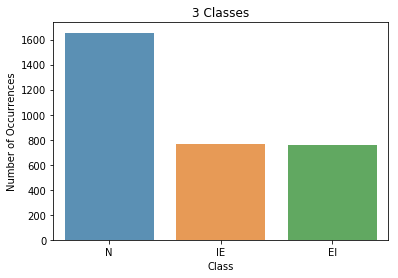

In [7]:
classes = df['class'].value_counts()

plt.figure()
sns.barplot(classes.index, classes.values, alpha=0.8)
plt.title('3 Classes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Class')
plt.show()

- 클래스 EI, IE, N을 0, 1, 2로 변환

In [8]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,class,name,sequence
0,0,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGG...
1,0,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
2,0,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
3,0,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
4,0,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...


### 2.2 name

- name을 살펴보면 '코드-분류-일련번호'와 같은 형태이다.
- 특히 분류에서 EI는 DONOR, IE는 ACCEPTOR, N은 NEG로 표현되어 있다.
- 학습에는 사용하지 않을 것이므로 drop하기로 한다.

In [9]:
df = df.drop(columns='name')
df.head()

,class,sequence
0,0,CCAGCTGCATCACAGGAGGCCAGCGAGCAGG...
1,0,AGACCCGCCGGGAGGCGGAGGACCTGCAGGG...
2,0,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGG...
3,0,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGT...
4,0,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTG...


### 2.3 sequence

- {A, G, C, T, D, N, S, R}에 one-hot encoding을 적용한다.

In [10]:
def one_hot_encoding(arr):
    ohe = OneHotEncoder(sparse=False)
    vector = ohe.fit_transform([[i] for i in arr])
    chr2idx = {}
    for i in range(len(arr)):
        chr2idx[arr[i]] = vector[i].tolist()
    return chr2idx

In [11]:
nucleotide = ['A', 'G', 'C', 'T', 'D', 'N', 'S', 'R']
chr2idx = one_hot_encoding(nucleotide)
chr2idx

{'A': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'G': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 'C': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'T': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 'D': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'N': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'S': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 'R': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]}

In [12]:
def chr_encoding(seq, chr2idx):
    result = []
    for ch in seq.strip():
        for e in chr2idx[ch]:
            result.append(e)
    return result

In [13]:
df['sequence'] = df['sequence'].apply(chr_encoding, chr2idx=chr2idx)
df.head()

,class,sequence
0,0,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
3,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,0,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


### 2.4 data split

- train/test 데이터셋을 7:3 비율로 나눔

In [14]:
X = np.vstack(df['sequence'])
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, stratify=y, test_size=0.3, random_state=123)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (2224, 480)
X_test:  (954, 480)
y_train:  (2224,)
y_test:  (954,)


## 3. Select a model

- 클래스의 수가 불균형하므로 stratified하게 교차검증한다.
- (아래 이미지와 reference 참고)

![stratifiedkfold](https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_0071.png)

In [15]:
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

- 사용할 모델은 분류 과제에 적합한 KNN, Decision Tree, Naive Bayes, SVM, Random Forest을 선택

![machine learning cheat sheet](https://scikit-learn.org/stable/_static/ml_map.png)

In [16]:
scoring = 'accuracy'

def print_score(scores):
    print(scores)
    print('train score: ', round(scores.mean()*100, 2))

### 3.1 KNN

In [17]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, scoring=scoring, cv=skf)

print_score(scores)

[0.77088949 0.78032345 0.75810811]
train score:  76.98


### 3.2 Decision Tree

In [18]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, scoring=scoring, cv=skf)

print_score(scores)

[0.893531   0.91374663 0.92027027]
train score:  90.92


### 3.3 Naive Bayes

In [19]:
clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, scoring=scoring, cv=skf)

print_score(scores)

[0.91239892 0.93126685 0.89864865]
train score:  91.41


### 3.4 SVM

FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)

In [21]:
clf = SVC(gamma='auto')
scores = cross_val_score(clf, X_train, y_train, scoring=scoring, cv=skf)

print_score(scores)

[0.95283019 0.96226415 0.95540541]
train score:  95.68


### 3.5 Random Forest

FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

In [20]:
clf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(clf, X_train, y_train, scoring=scoring, cv=skf)

print_score(scores)

[0.95283019 0.96361186 0.96216216]
train score:  95.95


| Model         | Accuracy |
|---------------|----------|
| KNN           | 76.98    |
| Decision Tree | 90.92    |
| Naive Bayes   | 91.41    |
| SVM           | 95.68    |
| Random Forest | 95.95    |

- 최종적으로 Random Forest 모델 선택

## 4. Tune parameters & Test

- n_estimators: number of trees in random forest
- max_features: number of features to consider at every split

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000], 'max_features': ['auto', 'sqrt']}


In [23]:
clf = RandomForestClassifier()
rscv = RandomizedSearchCV(clf, random_grid, cv = skf, n_jobs = -1, verbose=2, random_state=111)
rscv.fit(X_train, y_train)

print('best_params: ', rscv.best_params_)
print('best_score: ', round(rscv.best_score_*100, 2))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished


best_params:  {'n_estimators': 800, 'max_features': 'auto'}
best_score:  96.58


- 파라미터 튜닝으로 정확도 약 0.6% 상승

In [24]:
score = rscv.score(X_test, y_test)
print('test score: ', round(score*100, 2))

test score:  97.06


- 최종적인 정확도 97.06%
- test 데이터셋의 정확도가 train 데이터셋의 정확도보다 소폭 높음

## 5. References

- https://github.com/yisu-kim/TIL/blob/master/DataScience/Kaggle_Titanic.ipynb
- https://github.com/QuentinQingLi/DNASeqClassifier/blob/master/TensorFlow/DNASeqClf.ipynb
- https://scikit-learn.org/stable/modules/cross_validation.html
- https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html